Social network advertising, also social media targeting, is a group of terms that are used to describe forms of online advertising/digital marketing that focus on social networking services. One of the major benefits of this type of advertising is that advertisers can take advantage of the users' demographic information and target their ads appropriately.

Social media targeting combines current targeting options (such as geotargeting, behavioral targeting, socio-psychographic targeting, etc.), to make detailed target group identification possible. With social media targeting, advertisements are distributed to users based on information gathered from target group profiles.

Social network advertising is not necessarily the same as social media targeting. Social media targeting is a method of optimizing social media advertising by using profile data to deliver advertisements directly to individual users. Social network advertising refers to the process of matching social network users to target groups that have been specified by the advertiser. Social media advertising involves creating content on social media platforms, engaging with followers, and running social media advertisements.

Source: [Wikipedia](https://en.wikipedia.org/wiki/Social_network_advertising)

For this assignment, we will take a look at how Social Network pick who to advertise using k-Nearest Neighbor algorithm. We will leverage the [Social Network Ads dataset](https://www.kaggle.com/rakeshrau/social-network-ads).

First, let's import the data

# Learning Objectives
- Define basic terminology of machine learning.
- Describe a typical machine learning modeling process.
- Demonstrate the ability to use K-Nearest Neighbor algorithm.
- Demonstrate the ability to tweak K-Nearest Neighbor algorithm.
- Demonstrate the ability to determine the accuracy of a model.

In [1]:
import numpy as np
import pandas as pd

SNA = pd.read_csv('./Social_Network_Ads.csv')

Question 1: Print the top 10 rows of the dataset

In [2]:
SNA.head(10)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
5,15728773,Male,27,58000,0
6,15598044,Female,27,84000,0
7,15694829,Female,32,150000,1
8,15600575,Male,25,33000,0
9,15727311,Female,35,65000,0


Question 1.2: Drop the User Id column from the SNA dataframe using [drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html) method

In [3]:
SNA.drop(labels='User ID', axis=1, inplace=True)

Question 2.1: Within the Gender column, replace the text Male and Female with 0 and 1 respectively. You can use [replace](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html) method.

In [4]:
SNA_edited = SNA.replace(to_replace='Male', value=0)
SNA_edited = SNA_edited.replace(to_replace='Female', value=1)

Question 2.2: Check if successful by printing top 10 rows

In [5]:
SNA_edited.head(10)

,Gender,Age,EstimatedSalary,Purchased
0,0,19,19000,0
1,0,35,20000,0
2,1,26,43000,0
3,1,27,57000,0
4,0,19,76000,0
5,0,27,58000,0
6,1,27,84000,0
7,1,32,150000,1
8,0,25,33000,0
9,1,35,65000,0


As part of any machine learning problem, we need to explore the data and perform exploratory data analysis. For the next set of questions, we will be using [seaborn](https://seaborn.pydata.org/index.html) library for visualization.

Question 3.1: Using Seaboard [scatterplot](https://seaborn.pydata.org/generated/seaborn.scatterplot.html), create three pairwise scatter plots using Purchased column as hue for the following pairs:
1. Age & EstimatedSalary
2. Age & Gender
3. Gender & EstimatedSalary

<AxesSubplot:xlabel='Age', ylabel='EstimatedSalary'>

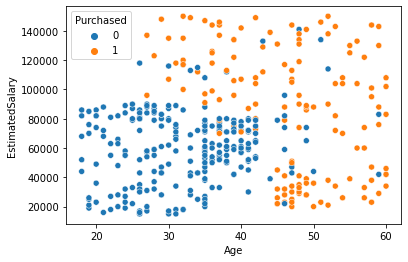

In [35]:
import seaborn as sns

sns.scatterplot(data=SNA_edited, x="Age", y="EstimatedSalary", hue="Purchased")


<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

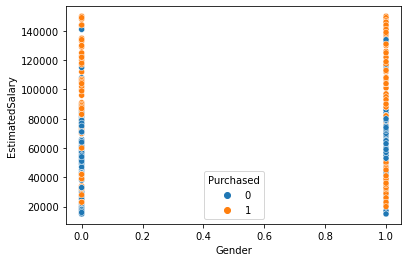

In [36]:
sns.scatterplot(data=SNA_edited, x="Gender", y="EstimatedSalary", hue="Purchased")


<AxesSubplot:xlabel='Age', ylabel='Gender'>

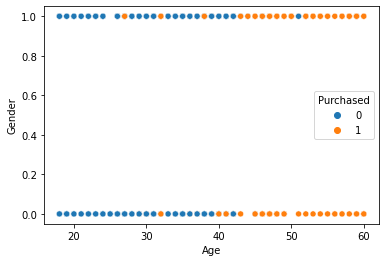

In [37]:
sns.scatterplot(data=SNA_edited, x="Age", y="Gender", hue="Purchased")


Question 3.2: Based on the above plots, which feature(s) can be best used to determine if a person will purchase an item based on Ad? 

Age & EstimatedSalary

Question 3.3: Use histogram plots to validate your answer. Set the Hue to be 'Purchased'

<AxesSubplot:xlabel='Age', ylabel='Count'>

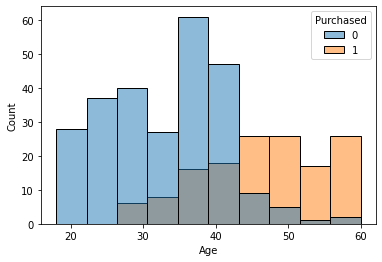

In [38]:
sns.histplot(data=SNA_edited, x='Age',hue='Purchased')

<AxesSubplot:xlabel='Gender', ylabel='Count'>

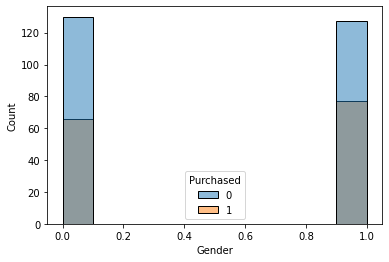

In [39]:
sns.histplot(data=SNA_edited, x='Gender',hue='Purchased')

<AxesSubplot:xlabel='EstimatedSalary', ylabel='Count'>

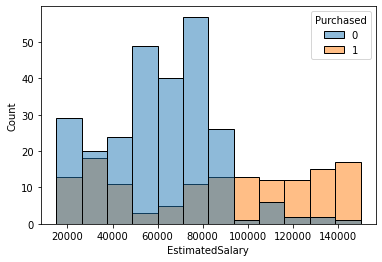

In [40]:
sns.histplot(data=SNA_edited, x='EstimatedSalary',hue='Purchased')

Question 4: Now that we have performed data exploration, lets experiment with k-NN algorithm. But first, we need to split the data into training and testing set. To perform this task, you can use [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) to create a 70/30 split for training and test data respectively.

In [6]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = SNA_edited.iloc[:, :-1].values  
y = SNA_edited.iloc[:, 3].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Question 5.1: Using [KNeighborsClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html), write a k-NN classifier with n=2

In [7]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 2)
clf = KNeighborsClassifier(n_neighbors=2)

# Fitting the model
clf.fit(X=X_train,y=y_train)

# Predicting the Test set results
y_pred = clf.predict(X=X_test)

Using [classification_report](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html), [confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html), [accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html), evaluate and print the classifier output

In [8]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score  

print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[73  8]
 [15 24]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        81
           1       0.75      0.62      0.68        39

    accuracy                           0.81       120
   macro avg       0.79      0.76      0.77       120
weighted avg       0.80      0.81      0.80       120

0.8083333333333333


Question 5.2: What happens when you increase the value of k from 2 to 10. Iterate over k from 2 to 10, build and evaluate the different KNeighborsClassifier

In [9]:
for k in range(2,11):
    print('K value is ',k)
    clf = KNeighborsClassifier(n_neighbors=k)

    # Fitting the model
    clf.fit(X=X_train,y=y_train)

    # Predicting the Test set results
    y_pred = clf.predict(X=X_test)
    
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

K value is  2
[[73  8]
 [15 24]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        81
           1       0.75      0.62      0.68        39

    accuracy                           0.81       120
   macro avg       0.79      0.76      0.77       120
weighted avg       0.80      0.81      0.80       120

0.8083333333333333
K value is  3
[[68 13]
 [ 8 31]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        81
           1       0.70      0.79      0.75        39

    accuracy                           0.82       120
   macro avg       0.80      0.82      0.81       120
weighted avg       0.83      0.82      0.83       120

0.825
K value is  4
[[73  8]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        81
           1       0.79      0.77      0.78        39

    accuracy                           0.86       120
   m

Question 5.3: What happened to the accuracy of the classifier at k>9 and why?

Accuracy decreased due to overfitting

Question 6.1: Now try eliminating one of the features (Eender) from the dataset

In [10]:
X_train_no_gender=X_train[:,1:4]
X_test_no_gender=X_test[:,1:4]
print(X_train_no_gender)

[[    32 135000]
 [    25  33000]
 [    18  52000]
 [    52  90000]
 [    37  80000]
 [    38  50000]
 [    27  17000]
 [    21  16000]
 [    42  65000]
 [    40  61000]
 [    35  72000]
 [    35  50000]
 [    33  41000]
 [    29  75000]
 [    24  55000]
 [    45  45000]
 [    45  22000]
 [    20  23000]
 [    41  87000]
 [    37  72000]
 [    26  17000]
 [    60 102000]
 [    60  46000]
 [    35  20000]
 [    26  84000]
 [    40  57000]
 [    20  82000]
 [    19  19000]
 [    54 108000]
 [    24  32000]
 [    49  36000]
 [    26  30000]
 [    39  42000]
 [    54 104000]
 [    46  41000]
 [    60  34000]
 [    24  89000]
 [    31  15000]
 [    38  61000]
 [    23  82000]
 [    35  25000]
 [    40  47000]
 [    42  73000]
 [    51 146000]
 [    41  51000]
 [    47 107000]
 [    30  62000]
 [    33  69000]
 [    36  75000]
 [    31  68000]
 [    26  86000]
 [    46  22000]
 [    37  79000]
 [    59 130000]
 [    49  39000]
 [    30  80000]
 [    21  68000]
 [    37  52000]
 [    27  5700

Question 6.2: Perform the same task from question 5.2 with the updated data

In [11]:
for k in range(2,11):
    print('K value is ',k)
    clf = KNeighborsClassifier(n_neighbors=k)

    # Fitting the model
    clf.fit(X=X_train_no_gender,y=y_train)

    # Predicting the Test set results
    y_pred = clf.predict(X=X_test_no_gender)
    
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

K value is  2
[[73  8]
 [15 24]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        81
           1       0.75      0.62      0.68        39

    accuracy                           0.81       120
   macro avg       0.79      0.76      0.77       120
weighted avg       0.80      0.81      0.80       120

0.8083333333333333
K value is  3
[[68 13]
 [ 8 31]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        81
           1       0.70      0.79      0.75        39

    accuracy                           0.82       120
   macro avg       0.80      0.82      0.81       120
weighted avg       0.83      0.82      0.83       120

0.825
K value is  4
[[73  8]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        81
           1       0.79      0.77      0.78        39

    accuracy                           0.86       120
   m

Question 6.3: What happened to the results? What's your conclusion? Plot accuracy vs k.

Results remained the same. Thus Gender was not a major influencer to the classifier

Question 7: Repeat steps 6.1-6.3 with another distance metric. Comment on what happens to the results?

In [12]:
for k in range(2,11):
    print('K value is ',k)
    clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='uniform')

    # Fitting the model
    clf.fit(X=X_train_no_gender,y=y_train)

    # Predicting the Test set results
    y_pred = clf.predict(X=X_test_no_gender)
    
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

K value is  2
[[73  8]
 [15 24]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86        81
           1       0.75      0.62      0.68        39

    accuracy                           0.81       120
   macro avg       0.79      0.76      0.77       120
weighted avg       0.80      0.81      0.80       120

0.8083333333333333
K value is  3
[[68 13]
 [ 8 31]]
              precision    recall  f1-score   support

           0       0.89      0.84      0.87        81
           1       0.70      0.79      0.75        39

    accuracy                           0.82       120
   macro avg       0.80      0.82      0.81       120
weighted avg       0.83      0.82      0.83       120

0.825
K value is  4
[[73  8]
 [ 9 30]]
              precision    recall  f1-score   support

           0       0.89      0.90      0.90        81
           1       0.79      0.77      0.78        39

    accuracy                           0.86       120
   m

In [13]:
for k in range(2,11):
    print('K value is ',k)
    clf = KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='chebyshev',
                     metric_params=None, n_jobs=None, n_neighbors=k, p=2,
                     weights='uniform')

    # Fitting the model
    clf.fit(X=X_train_no_gender,y=y_train)

    # Predicting the Test set results
    y_pred = clf.predict(X=X_test_no_gender)
    
    print(confusion_matrix(y_test, y_pred))  
    print(classification_report(y_test, y_pred))
    print(accuracy_score(y_test, y_pred))

K value is  2
[[71 10]
 [17 22]]
              precision    recall  f1-score   support

           0       0.81      0.88      0.84        81
           1       0.69      0.56      0.62        39

    accuracy                           0.78       120
   macro avg       0.75      0.72      0.73       120
weighted avg       0.77      0.78      0.77       120

0.775
K value is  3
[[66 15]
 [ 7 32]]
              precision    recall  f1-score   support

           0       0.90      0.81      0.86        81
           1       0.68      0.82      0.74        39

    accuracy                           0.82       120
   macro avg       0.79      0.82      0.80       120
weighted avg       0.83      0.82      0.82       120

0.8166666666666667
K value is  4
[[71 10]
 [11 28]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.87        81
           1       0.74      0.72      0.73        39

    accuracy                           0.82       120
   m